In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import os
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug import parameters as iap
from tqdm import notebook as tqdm
import cv2

In [2]:
imgs_path = './example/cropped/'
save_path = './example/augmented/'

In [3]:
def load_images_from_folder(path):
    images = []
    for filename in os.listdir(path):
        try:
            img = cv2.imread(os.path.join(path, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        except:
            continue
        if img is not None:
            images.append(img)
    return images

In [18]:
## Read images
images = load_images_from_folder(imgs_path)
len(images)

484

In [ ]:
# Fix image orientations
for file in os.listdir(imgs_path):
    img = Image.open(imgs_path + file)
    width, height = img.size
    if width > height:
#         print(file)
        img = img.rotate(90, Image.NEAREST, expand = 1)

    img.save(imgs_path + file)

In [9]:
my_list = os.listdir(imgs_path)
for file in range(len(os.listdir(imgs_path))//2,len(my_list)):
    print(file)
    img = Image.open(imgs_path + my_list[file])
    width, height = img.size
    if width > height:
        print(file)
        img = img.rotate(90, Image.NEAREST, expand = 1)
    else:
        continue
        
    img.save(imgs_path + my_list[file])

242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483


In [19]:

my_list = os.listdir(imgs_path)
for file in tqdm(range(len(os.listdir(imgs_path)))):    
    img = Image.open(imgs_path + my_list[file])
    img = img.resize((192,256))
    img.save('./example/augmented/' + my_list[file])



<ipython-input-19-3302bee0375d>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(range(len(os.listdir(imgs_path)))):


In [33]:

my_list = os.listdir(imgs_path)
for file in tqdm(range(len(os.listdir(imgs_path))//2,len(my_list))):  
    img = Image.open(imgs_path + my_list[file])
    img = img.resize((192,256))
    img.save('./example/augmented/' + my_list[file])

<ipython-input-33-caa30d6a15f6>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(range(len(os.listdir(imgs_path))//2,len(my_list))):


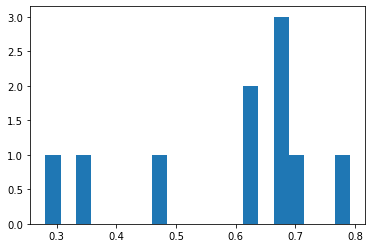

In [20]:
import matplotlib.pyplot as plt
plt.hist(ratios,bins = 20)
plt.show()

In [26]:
128*0.7276539733702174

93.13970859138783

In [13]:
196/2/2

49.0

In [18]:
np.median(ratios)

0.7276539733702174

# imgaug

1) use horizontal, vertical , and vertical-horizontal flips (thus each image creates 3 additional images)<br>
2) find useful range for Sharpen<br>
3) find noise level on additive gausian noise (for the eye it should be insdistinguishable)<br>
4) find good thresholds on Add lighness (should not be too contarstive) <br>
5) find good parameters range for AddtoHueSaturation <br>
6) find good parameter range for Multiply (it enhances channels with gievn probabilities) <br>
7) find good paremters for Linear Contrast

In [5]:
## Final pipeline
seq = iaa.Sequential(
    [
        iaa.Fliplr(0.25), # horizontally flip 50% of all images
        iaa.Flipud(0.25), # vertically flip 20% of all images
        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
        iaa.OneOf([iaa.AddToHueAndSaturation((-15, 15)), # change hue and saturation
                    iaa.Multiply((0.3, 1), per_channel=0.5)]),
        iaa.OneOf([iaa.LinearContrast((0.8, 1.2), per_channel=1),
                   iaa.Add((-10, 10), per_channel=0.5)]), 
        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
#         iaa.ContrastNormalization(
#             iap.Choice(
#                 [1.0, 1.5, 3.0],
#                 p=[0.5, 0.3, 0.2]
#             )
#         ),
    ]
)

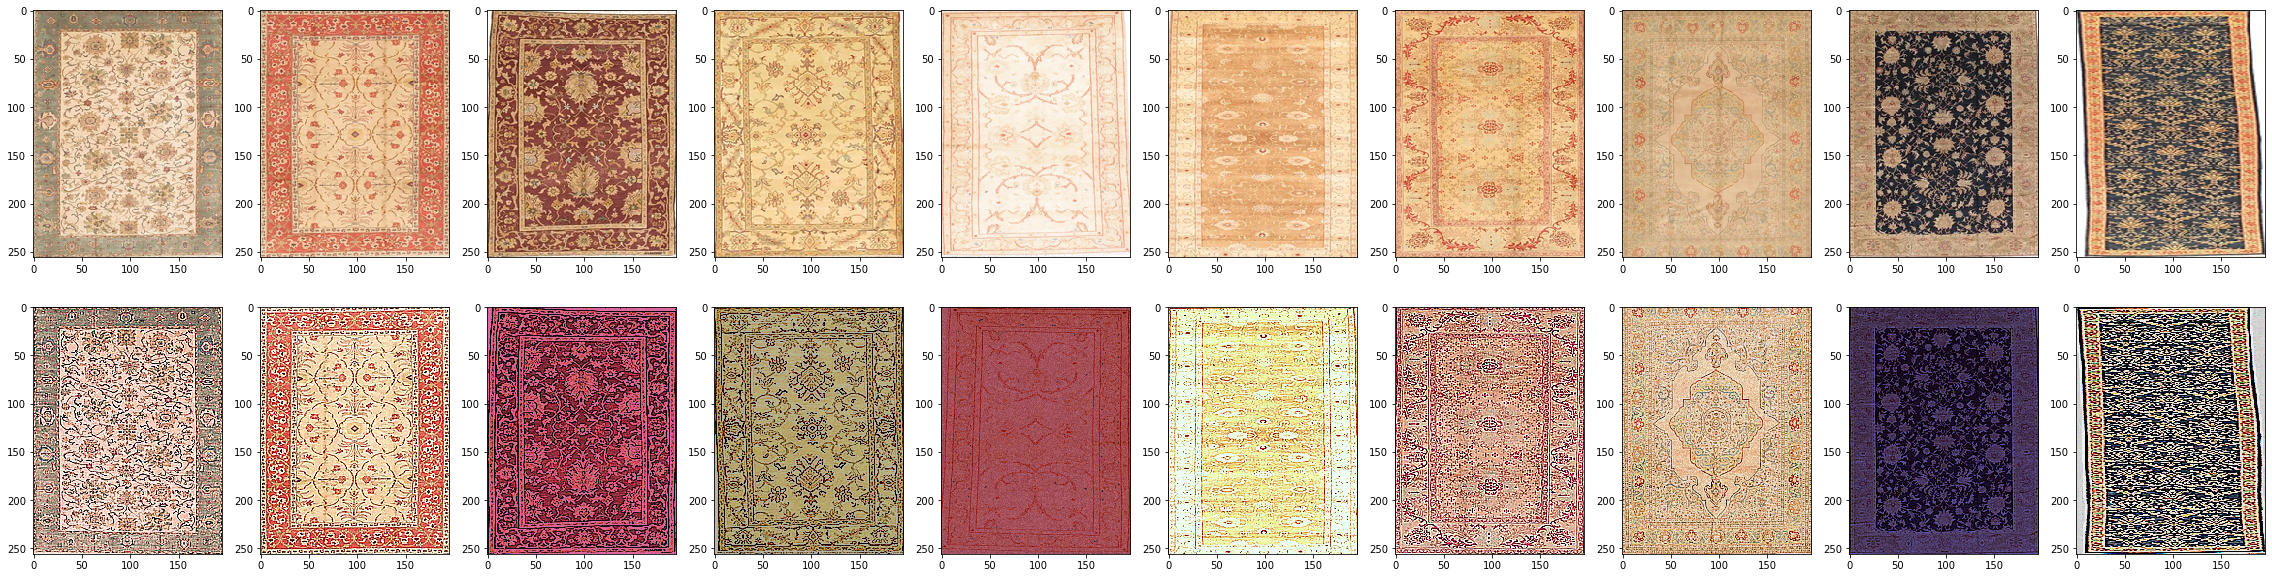

In [10]:
## Plotting
fig,axes = plt.subplots(2, 10, figsize = (40,10))
for c,i in enumerate([j for j in range(10)]):
    axes[0,c].imshow(images[i])
    
    img_aug = seq.augment_image(images[i])
    axes[1,c].imshow(img_aug)

In [20]:
## Saving

## Read images
images = load_images_from_folder(save_path)
len(images)
for i, img in tqdm(enumerate(images)):
    for j in range(4):
        img_aug = seq.augment_image(img)
        plt.imsave(save_path + 'aug_img_' + str(i) + '_' + str(j) + '.png' , img_aug)
    

<ipython-input-20-83f3eae77573>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, img in tqdm(enumerate(images)):
